# ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî Î¶¨Î∑∞ Í∞êÏ†ï Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏

## Í∞úÏöî
Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞(NSMC)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞êÏ†ï Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÏôÑÏ†ÑÌïú Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨Ï∂ïÌï©ÎãàÎã§.

### Ï£ºÏöî ÌïôÏäµ ÎÇ¥Ïö©:
1. **Korpora ÎùºÏù¥Î∏åÎü¨Î¶¨**Î•º ÌÜµÌïú NSMC Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
2. **Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ìôî**: train/validation/test Î∂ÑÌï† Î∞è ÌååÏùº ÏãúÏä§ÌÖú Íµ¨Ï°∞ ÏÉùÏÑ±
3. **TensorFlow Dataset API**Î•º ÌôúÏö©Ìïú ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
4. **ÌïúÍ∏Ä ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨**: KoNLPy + TensorFlow ÌÜµÌï©
5. **Î≤°ÌÑ∞Ìôî ÌååÏù¥ÌîÑÎùºÏù∏**: Ïã§ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
6. **ÏÑ±Îä• ÏµúÏ†ÅÌôî**: Ï∫êÏã±, ÌîÑÎ¶¨ÌéòÏπ≠, Î≥ëÎ†¨ Ï≤òÎ¶¨

## 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è ÌôòÍ≤Ω ÏÑ§Ï†ï

### 1.1 ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
```bash
# Korpora ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò (condaÎ°ú ÏÑ§ÏπòÍ∞Ä ÏïàÎêòÎØÄÎ°ú pip ÏÇ¨Ïö©)
pip install Korpora
```

In [2]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
from konlpy.tag import Okt
import re
import os
import pathlib
import shutil
import random
import numpy as np
from keras import layers

print(f"TensorFlow Î≤ÑÏ†Ñ: {tf.__version__}")
print(f"Python Î≤ÑÏ†Ñ: {tf.version.VERSION}")

# GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïó¨Î∂Ä ÌôïÏù∏
print(f"GPU ÏÇ¨Ïö© Í∞ÄÎä•: {tf.config.list_physical_devices('GPU')}")

TensorFlow Î≤ÑÏ†Ñ: 2.15.1
Python Î≤ÑÏ†Ñ: 2.15.1
GPU ÏÇ¨Ïö© Í∞ÄÎä•: []


## 2. NSMC Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Î∞è ÌÉêÏÉâ

### 2.1 KorporaÎ•º ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú

In [3]:
import os
from Korpora import Korpora

# Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï
data_dir = "../../data"
os.makedirs(data_dir, exist_ok=True)

# NSMC(Naver Sentiment Movie Corpus) Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
# Í∏∞Î≥∏ Í≤ΩÎ°ú ÎåÄÏã† ÏßÄÏ†ïÌïú Í≤ΩÎ°úÏóê Ï†ÄÏû•
print("NSMC Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Ï§ë...")
print(f"Ï†ÄÏû• Í≤ΩÎ°ú: {os.path.abspath(data_dir)}")

# root_dir ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ï†ÄÏû• ÏúÑÏπò ÏßÄÏ†ï
Korpora.fetch("nsmc", root_dir=data_dir)
print("Îã§Ïö¥Î°úÎìú ÏôÑÎ£å!")

NSMC Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Ï§ë...
Ï†ÄÏû• Í≤ΩÎ°ú: c:\Users\ryan9\GitHub\SeSac-AI-Developer-Notes-2025\07_Deep_Learning\data


[nsmc] download ratings_train.txt: 14.6MB [00:00, 16.2MB/s]                            
[nsmc] download ratings_test.txt: 4.90MB [00:00, 13.5MB/s]                            

Îã§Ïö¥Î°úÎìú ÏôÑÎ£å!


### 2.2 Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Î∞è Íµ¨Ï°∞ ÌôïÏù∏

In [4]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
corpus = Korpora.load("nsmc")

# Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌÉêÏÉâ
print("=== NSMC Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ===")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(corpus.train.texts)}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(corpus.test.texts)}")
print()

print("=== ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ (Ï≤´ 3Í∞ú) ===")
for i in range(3):
    print(f"ÏÉòÌîå {i+1}:")
    print(f"  ÌÖçÏä§Ìä∏: {corpus.train.texts[i]}")
    print(f"  ÎùºÎ≤®: {corpus.train.labels[i]} ({'Í∏çÏ†ï' if corpus.train.labels[i] == 1 else 'Î∂ÄÏ†ï'})")  # Ï†ïÏàò 1Í≥º ÎπÑÍµê
    print()


    Korpora Îäî Îã§Î•∏ Î∂ÑÎì§Ïù¥ Ïó∞Íµ¨ Î™©Ï†ÅÏúºÎ°ú Í≥µÏú†Ìï¥Ï£ºÏã† ÎßêÎ≠âÏπòÎì§ÏùÑ
    ÏÜêÏâΩÍ≤å Îã§Ïö¥Î°úÎìú, ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Í∏∞Îä•ÎßåÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.

    ÎßêÎ≠âÏπòÎì§ÏùÑ Í≥µÏú†Ìï¥ Ï£ºÏã† Î∂ÑÎì§ÏóêÍ≤å Í∞êÏÇ¨ÎìúÎ¶¨Î©∞, Í∞Å ÎßêÎ≠âÏπò Î≥Ñ ÏÑ§Î™ÖÍ≥º ÎùºÏù¥ÏÑºÏä§Î•º Í≥µÏú† ÎìúÎ¶ΩÎãàÎã§.
    Ìï¥Îãπ ÎßêÎ≠âÏπòÏóê ÎåÄÌï¥ ÏûêÏÑ∏Ìûà ÏïåÍ≥† Ïã∂ÏúºÏã† Î∂ÑÏùÄ ÏïÑÎûòÏùò description ÏùÑ Ï∞∏Í≥†,
    Ìï¥Îãπ ÎßêÎ≠âÏπòÎ•º Ïó∞Íµ¨/ÏÉÅÏö©Ïùò Î™©Ï†ÅÏúºÎ°ú Ïù¥Ïö©ÌïòÏã§ ÎïåÏóêÎäî ÏïÑÎûòÏùò ÎùºÏù¥ÏÑºÏä§Î•º Ï∞∏Í≥†Ìï¥ Ï£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/



### 2.3 ÎùºÎ≤®ÎßÅ Í≤ÄÏ¶ù Î∞è ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏


In [5]:
# ÏõêÎ≥∏ ÌååÏùºÏùÑ ÏßÅÏ†ë ÏùΩÏñ¥ÏÑú ÌôïÏù∏Ìï¥Î≥¥Ïûê
import pandas as pd

print("=== ÏõêÎ≥∏ ÌååÏùº ÏßÅÏ†ë ÌôïÏù∏ ===")
try:
    # ÏõêÎ≥∏ TSV ÌååÏùº ÏßÅÏ†ë ÏùΩÍ∏∞
    train_file_path = os.path.join(data_dir, "nsmc", "ratings_train.txt")
    
    # Ï≤´ Î™á Ï§ÑÏùÑ ÏßÅÏ†ë ÏùΩÏñ¥Î≥¥Í∏∞
    with open(train_file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()[:10]  # Ï≤´ 10Ï§Ñ
    
    print("ÏõêÎ≥∏ ÌååÏùº Ï≤´ 10Ï§Ñ:")
    for i, line in enumerate(lines):
        print(f"{i}: {line.strip()}")
    
    print("\n" + "="*50)
    
    # pandasÎ°ú Ï†ïÌôïÌûà ÌååÏã±Ìï¥Î≥¥Í∏∞
    df_train = pd.read_csv(train_file_path, sep='\t', encoding='utf-8')
    print(f"pandasÎ°ú ÏùΩÏùÄ Îç∞Ïù¥ÌÑ∞:")
    print(f"Ïª¨ÎüºÎ™Ö: {list(df_train.columns)}")
    print(f"Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {df_train.shape}")
    print("\nÏ≤´ 5Í∞ú ÏÉòÌîå:")
    print(df_train.head())
    
    print(f"\nÎùºÎ≤® Î∂ÑÌè¨:")
    print(df_train['label'].value_counts().sort_index())
    
    # Korpora Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÍµê
    print(f"\n=== Korpora vs ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê ===")
    print("Ï≤´ 5Í∞ú ÏÉòÌîå ÎπÑÍµê:")
    for i in range(5):
        korpora_text = corpus.train.texts[i]
        korpora_label = corpus.train.labels[i]
        pandas_text = df_train.iloc[i]['document']
        pandas_label = df_train.iloc[i]['label']
        
        print(f"\nÏÉòÌîå {i+1}:")
        print(f"  Korpora: '{korpora_text}' | ÎùºÎ≤®: {korpora_label}")
        print(f"  ÏõêÎ≥∏:    '{pandas_text}' | ÎùºÎ≤®: {pandas_label}")
        print(f"  Îß§Ïπò: {korpora_text == pandas_text and korpora_label == pandas_label}")

except Exception as e:
    print(f"ÏõêÎ≥∏ ÌååÏùº ÏùΩÍ∏∞ Ïã§Ìå®: {e}")

=== ÏõêÎ≥∏ ÌååÏùº ÏßÅÏ†ë ÌôïÏù∏ ===
ÏõêÎ≥∏ ÌååÏùº Ï≤´ 10Ï§Ñ:
0: id	document	label
1: 9976970	ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨	0
2: 3819312	Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò	1
3: 10265843	ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§	0
4: 9045019	ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï	0
5: 6483659	ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ÎçòÏä§Ìä∏Í∞Ä ÎÑàÎ¨¥ÎÇòÎèÑ Ïù¥ÎªêÎ≥¥ÏòÄÎã§	1
6: 5403919	Îßâ Í±∏ÏùåÎßà ÎóÄ 3ÏÑ∏Î∂ÄÌÑ∞ Ï¥àÎì±ÌïôÍµê 1ÌïôÎÖÑÏÉùÏù∏ 8ÏÇ¥Ïö©ÏòÅÌôî.„Öã„Öã„Öã...Î≥ÑÎ∞òÍ∞úÎèÑ ÏïÑÍπåÏõÄ.	0
7: 7797314	ÏõêÏûëÏùò Í∏¥Ïû•Í∞êÏùÑ Ï†úÎåÄÎ°ú ÏÇ¥Î†§ÎÇ¥ÏßÄÎ™ªÌñàÎã§.	0
8: 9443947	Î≥Ñ Î∞òÍ∞úÎèÑ ÏïÑÍπùÎã§ ÏöïÎÇòÏò®Îã§ Ïù¥ÏùëÍ≤Ω Í∏∏Ïö©Ïö∞ Ïó∞Í∏∞ÏÉùÌôúÏù¥Î™áÎÖÑÏù∏ÏßÄ..Ï†ïÎßê Î∞úÎ°úÌï¥ÎèÑ Í∑∏Í≤ÉÎ≥¥Îã® ÎÇ´Í≤üÎã§ ÎÇ©Ïπò.Í∞êÍ∏àÎßåÎ∞òÎ≥µÎ∞òÎ≥µ..Ïù¥ÎìúÎùºÎßàÎäî Í∞ÄÏ°±ÎèÑÏóÜÎã§ Ïó∞Í∏∞Î™ªÌïòÎäîÏÇ¨ÎûåÎßåÎ™®ÏóøÎÑ§	0
9: 7156791	Ïï°ÏÖ

In [6]:
# ÎùºÎ≤®ÎßÅ Î¨∏Ï†ú Î∂ÑÏÑù: ÏÉòÌîåÎì§ÏùÑ Îçî ÏûêÏÑ∏Ìûà ÏÇ¥Ìé¥Î≥¥Ïûê
print("=== ÏùòÏã¨Ïä§Îü¨Ïö¥ ÎùºÎ≤®ÎßÅ ÏÉòÌîå Î∂ÑÏÑù ===")

# Î™ÖÎ∞±Ìûà Í∏çÏ†ïÏ†ÅÏù∏ ÌëúÌòÑÎì§ÏùÑ Í∞ÄÏßÑ Î∂ÄÏ†ï ÎùºÎ≤® ÏÉòÌîåÎì§ Ï∞æÍ∏∞
positive_words = ['Ï¢ã', 'Ïû¨ÎØ∏', 'Ï∂îÏ≤ú', 'ÏµúÍ≥†', 'ÌõåÎ•≠', 'Í∞êÎèô', 'Î©ãÏßÑ', 'ÏôÑÎ≤Ω']
negative_words = ['ÏßúÏ¶ù', 'Î≥ÑÎ°ú', 'ÏµúÏïÖ', 'Ïã§Îßù', 'ÏßÄÎ£®', 'Ïû¨ÎØ∏ÏóÜ', 'ÏïÑÍπù']

print("Î∂ÄÏ†ï ÎùºÎ≤®(0)Ïù∏Îç∞ Í∏çÏ†ï Îã®Ïñ¥Í∞Ä Ìè¨Ìï®Îêú ÏÉòÌîåÎì§:")
positive_in_negative = []
for i in range(min(1000, len(corpus.train.texts))):  # Ï≤´ 1000Í∞úÎßå ÌôïÏù∏
    text = corpus.train.texts[i]
    label = corpus.train.labels[i]
    
    if label == 0:  # Î∂ÄÏ†ï ÎùºÎ≤®
        if any(pos_word in text for pos_word in positive_words):
            positive_in_negative.append((i, text, label))
            if len(positive_in_negative) <= 5:  # Ï≤òÏùå 5Í∞úÎßå Ï∂úÎ†•
                print(f"  {i}: [{label}] {text}")

print(f"\nÏ¥ù {len(positive_in_negative)}Í∞ú Î∞úÍ≤¨")

print("\n" + "="*50)
print("Í∏çÏ†ï ÎùºÎ≤®(1)Ïù∏Îç∞ Î∂ÄÏ†ï Îã®Ïñ¥Í∞Ä Ìè¨Ìï®Îêú ÏÉòÌîåÎì§:")
negative_in_positive = []
for i in range(min(1000, len(corpus.train.texts))):
    text = corpus.train.texts[i]
    label = corpus.train.labels[i]
    
    if label == 1:  # Í∏çÏ†ï ÎùºÎ≤®
        if any(neg_word in text for neg_word in negative_words):
            negative_in_positive.append((i, text, label))
            if len(negative_in_positive) <= 5:  # Ï≤òÏùå 5Í∞úÎßå Ï∂úÎ†•
                print(f"  {i}: [{label}] {text}")

print(f"\nÏ¥ù {len(negative_in_positive)}Í∞ú Î∞úÍ≤¨")

# Ï†ÑÏ≤¥ ÎùºÎ≤® Î∂ÑÌè¨ Îã§Ïãú ÌôïÏù∏
print("\n" + "="*50)
print("=== Ï†ÑÏ≤¥ ÎùºÎ≤® Î∂ÑÌè¨ ÌôïÏù∏ ===")
pos_count = sum(1 for label in corpus.train.labels if label == 1)
neg_count = sum(1 for label in corpus.train.labels if label == 0)
total = len(corpus.train.labels)

print(f"Í∏çÏ†ï(1): {pos_count:,}Í∞ú ({pos_count/total*100:.1f}%)")
print(f"Î∂ÄÏ†ï(0): {neg_count:,}Í∞ú ({neg_count/total*100:.1f}%)")
print(f"Ï¥ù ÏÉòÌîå: {total:,}Í∞ú")

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÍ≥º Í≥†Ïú†Í∞í ÌôïÏù∏
print(f"\nÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: {type(corpus.train.labels[0])}")
print(f"ÎùºÎ≤® Í≥†Ïú†Í∞í: {set(corpus.train.labels)}")

print("\n=== Í≤∞Î°† ===")
print("NSMC Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ïã§Ï†úÎ°ú ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§.")
print("ÏùºÎ∂Ä ÎùºÎ≤®ÎßÅ Ïò§Î•òÍ∞Ä Ï°¥Ïû¨Ìï† Ïàò ÏûàÏúºÎ©∞, Ïù¥Îäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌùîÌûà Î∞úÏÉùÌïòÎäî Î¨∏Ï†úÏûÖÎãàÎã§.")
print("Î™®Îç∏ ÌõàÎ†® ÏãúÏóêÎäî Ïù¥Îü¨Ìïú ÎÖ∏Ïù¥Ï¶àÎ•º Í≥†Î†§ÌïòÏó¨ ÏßÑÌñâÌï¥Ïïº Ìï©ÎãàÎã§.")

=== ÏùòÏã¨Ïä§Îü¨Ïö¥ ÎùºÎ≤®ÎßÅ ÏÉòÌîå Î∂ÑÏÑù ===
Î∂ÄÏ†ï ÎùºÎ≤®(0)Ïù∏Îç∞ Í∏çÏ†ï Îã®Ïñ¥Í∞Ä Ìè¨Ìï®Îêú ÏÉòÌîåÎì§:
  2: [0] ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§
  3: [0] ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï
  14: [0] Ï∑®Ìñ•ÏùÄ Ï°¥Ï§ëÌïúÎã§ÏßÄÎßå ÏßÑÏßú ÎÇ¥ÏÉùÏóê Í∑πÏû•ÏóêÏÑú Î≥∏ ÏòÅÌôîÏ§ë Í∞ÄÏû• ÎÖ∏Ïûº ÎÖ∏Í∞êÎèôÏûÑ Ïä§ÌÜ†Î¶¨ÎèÑ Ïñ¥Í±∞ÏßÄÍ≥† Í∞êÎèôÎèÑ Ïñ¥Í±∞ÏßÄ
  17: [0] ÍµøÎ∞îÏù¥ Î†àÎãå ÌëúÏ†àÏù∏Í≤ÉÏùÄ Ïù¥Ìï¥ÌïòÎäîÎç∞ Ïôú Îí§Î°ú Í∞àÏàòÎ°ù Ïû¨ÎØ∏ÏóÜÏñ¥ÏßÄÎÉê
  22: [0] Ïû¨ÎØ∏ÏóÜÎã§ ÏßÄÎ£®ÌïòÍ≥†. Í∞ôÏùÄ ÏùåÏãù ÏòÅÌôîÏù∏Îç∞ÎèÑ Î∞îÎ≤†Ìä∏Ïùò ÎßåÏ∞¨ÌïòÍ≥† ÎÑò Ï∞®Ïù¥ÎÇ®....Î∞îÎ≤†Ìä∏Ïùò ÎßåÏ∞¨ÏùÄ Ïù¥ÏïºÍ∏∞ÎèÑ ÏûàÍ≥† ÏùåÏãù Î≥¥ÎäîÏû¨ÎØ∏ÎèÑ ÏûàÎäîÎç∞ ; Ïù¥Í±¥ Î≥ºÍ≤åÏóÜÎã§ ÏùåÏãùÎèÑ Î≥ÑÎ°ú ÏïàÎÇòÏò§Í≥†, ÌïÄÎûÄÎìú ÌíçÍ≤ΩÏù¥ÎùºÎèÑ Íµ¨Í≤ΩÌï†Îû´ÎäîÎç∞ Í∑∏Í≤ÉÎèÑ Î≥ÑÎ°ú ÏïàÎÇòÏò¥ „Ö°„Ö°

Ï¥ù 92Í∞ú Î∞úÍ≤¨

Í∏çÏ†ï ÎùºÎ≤®(1)Ïù∏Îç∞ Î∂ÄÏ†ï Îã®Ïñ¥Í∞Ä Ìè¨Ìï®Îêú ÏÉòÌîåÎì§:
  142: [1] ÏÜîÏßÅÌûà ÏóêÎ≥ºÎùºÎ∞îÏù¥Îü¨Ïä§Í∞Ä Îñ†Îì§ÏÑùÌï¥ÏÑú Î≥¥Í≤åÎêúÏòÅÌôîÏù∏Îç∞ ÏûëÌíàÏÑ±Ïù¥ÎÇ

## 3. Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ìôî Î∞è ÌååÏùº ÏãúÏä§ÌÖú Ï§ÄÎπÑ

TensorFlowÏùò `text_dataset_from_directory`Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞Î°ú Ï†ïÎ¶¨Ìï©ÎãàÎã§.

### 3.1 Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ìôî Ìï®Ïàò Ï†ïÏùò

In [7]:
def create_korean_dataset(base_dir=None, validation_size=1000):
    """
    NSMC Îç∞Ïù¥ÌÑ∞Î•º TensorFlow Dataset ÌòïÏãùÏùò ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞Î°ú Î≥ÄÌôò
    
    Íµ¨Ï°∞:
    ../../data/korean_imdb/
    ‚îú‚îÄ‚îÄ train/
    ‚îÇ   ‚îú‚îÄ‚îÄ pos/  (Í∏çÏ†ï Î¶¨Î∑∞Îì§)
    ‚îÇ   ‚îî‚îÄ‚îÄ neg/  (Î∂ÄÏ†ï Î¶¨Î∑∞Îì§)
    ‚îú‚îÄ‚îÄ val/
    ‚îÇ   ‚îú‚îÄ‚îÄ pos/
    ‚îÇ   ‚îî‚îÄ‚îÄ neg/
    ‚îî‚îÄ‚îÄ test/
        ‚îú‚îÄ‚îÄ pos/
        ‚îî‚îÄ‚îÄ neg/
    
    Args:
        base_dir (str): ÎîîÎ†âÌÜ†Î¶¨ Ïù¥Î¶Ñ (Í∏∞Î≥∏Í∞í: NoneÏù¥Î©¥ data_dir/korean_imdb ÏÇ¨Ïö©)
        validation_size (int): Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ)
    
    Returns:
        str: ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
    """
    
    if base_dir is None:
        base_dir = os.path.join(data_dir, "korean_imdb")
    
    print(f"Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ìôî ÏãúÏûë: {base_dir}")
    
    # Í∏∞Ï°¥ ÎîîÎ†âÌÜ†Î¶¨ ÏÇ≠Ï†ú (ÏûàÎã§Î©¥)
    if os.path.exists(base_dir):
        try:
            shutil.rmtree(base_dir)
            print(f"Í∏∞Ï°¥ ÎîîÎ†âÌÜ†Î¶¨ ÏÇ≠Ï†ú: {base_dir}")
        except OSError as e:
            print(f"ÎîîÎ†âÌÜ†Î¶¨ ÏÇ≠Ï†ú Ïò§Î•ò: {e}")
    
    # ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞ ÏÉùÏÑ±
    directories = [
        os.path.join(base_dir, "train", "pos"),
        os.path.join(base_dir, "train", "neg"),
        os.path.join(base_dir, "val", "pos"),
        os.path.join(base_dir, "val", "neg"),
        os.path.join(base_dir, "test", "pos"),
        os.path.join(base_dir, "test", "neg")
    ]
    
    for directory in directories:
        os.makedirs(directory, exist_ok=True)
    
    print("ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞ ÏÉùÏÑ± ÏôÑÎ£å")
    
    return base_dir

### 3.2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∞è ÌååÏùº Ï†ÄÏû•

In [8]:
def save_data_to_files(corpus, base_dir, validation_size=1000):
    """
    corpus Îç∞Ïù¥ÌÑ∞Î•º ÌååÏùºÎ°ú Ï†ÄÏû•
    """
    
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®Î≥Ñ Î∂ÑÎ¶¨
    print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Ï§ë...")
    pos_train_texts = []
    neg_train_texts = []
    
    for text, label in zip(corpus.train.texts, corpus.train.labels):
        if label == 1:  # Ï†ïÏàò 1Î°ú ÎπÑÍµê
            pos_train_texts.append(text)
        elif label == 0:  # Ï†ïÏàò 0Î°ú ÎπÑÍµê
            neg_train_texts.append(text)
    
    print(f"Í∏çÏ†ï ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(pos_train_texts):,}Í∞ú")
    print(f"Î∂ÄÏ†ï ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(neg_train_texts):,}Í∞ú")
    
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®Î≥Ñ Î∂ÑÎ¶¨
    print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Ï§ë...")
    pos_test_texts = []
    neg_test_texts = []
    
    for text, label in zip(corpus.test.texts, corpus.test.labels):
        if label == 1:  # Ï†ïÏàò 1Î°ú ÎπÑÍµê
            pos_test_texts.append(text)
        elif label == 0:  # Ï†ïÏàò 0Î°ú ÎπÑÍµê
            neg_test_texts.append(text)
    
    print(f"Í∏çÏ†ï ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(pos_test_texts):,}Í∞ú")
    print(f"Î∂ÄÏ†ï ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(neg_test_texts):,}Í∞ú")
    
    # Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïúÏßÄ ÌôïÏù∏
    if len(pos_train_texts) < validation_size or len(neg_train_texts) < validation_size:
        print(f"Í≤ΩÍ≥†: Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏúÑÌïú Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        validation_size = min(len(pos_train_texts), len(neg_train_texts)) // 2
        print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Î•º {validation_size}Í∞úÎ°ú Ï°∞Ï†ïÌï©ÎãàÎã§.")
    
    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùºÎ∂Ä Ï∂îÏ∂ú)
    print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Ï§ë... (Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ {validation_size}Í∞ú)")
    pos_val_texts = pos_train_texts[:validation_size] if pos_train_texts else []
    neg_val_texts = neg_train_texts[:validation_size] if neg_train_texts else []
    
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
    pos_train_texts = pos_train_texts[validation_size:] if pos_train_texts else []
    neg_train_texts = neg_train_texts[validation_size:] if neg_train_texts else []
    
    print(f"ÏµúÏ¢Ö ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ - Í∏çÏ†ï: {len(pos_train_texts):,}Í∞ú, Î∂ÄÏ†ï: {len(neg_train_texts):,}Í∞ú")
    print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ - Í∏çÏ†ï: {len(pos_val_texts):,}Í∞ú, Î∂ÄÏ†ï: {len(neg_val_texts):,}Í∞ú")
    
    # ÌååÏùº Ï†ÄÏû• Ìï®Ïàò
    def save_texts_to_files(texts, directory, prefix):
        os.makedirs(directory, exist_ok=True)  # ÎîîÎ†âÌÜ†Î¶¨Í∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±
        for i, text in enumerate(texts):
            filename = f"{prefix}_{i}.txt"
            filepath = os.path.join(directory, filename)
            with open(filepath, "w", encoding="utf-8") as f:
                f.write(text)
    
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
    print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• Ï§ë...")
    if pos_train_texts:
        save_texts_to_files(pos_train_texts, os.path.join(base_dir, "train", "pos"), "pos")
    if neg_train_texts:
        save_texts_to_files(neg_train_texts, os.path.join(base_dir, "train", "neg"), "neg")
    
    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
    print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• Ï§ë...")
    if pos_val_texts:
        save_texts_to_files(pos_val_texts, os.path.join(base_dir, "val", "pos"), "pos")
    if neg_val_texts:
        save_texts_to_files(neg_val_texts, os.path.join(base_dir, "val", "neg"), "neg")
    
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
    print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• Ï§ë...")
    if pos_test_texts:
        save_texts_to_files(pos_test_texts, os.path.join(base_dir, "test", "pos"), "pos")
    if neg_test_texts:
        save_texts_to_files(neg_test_texts, os.path.join(base_dir, "test", "neg"), "neg")
    
    print("Î™®Îì† Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å!")
    return {
        'train_pos': len(pos_train_texts),
        'train_neg': len(neg_train_texts), 
        'val_pos': len(pos_val_texts),
        'val_neg': len(neg_val_texts),
        'test_pos': len(pos_test_texts),
        'test_neg': len(neg_test_texts)
    }

# Ïã§Ìñâ (ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§)
korean_data_dir = create_korean_dataset()
data_stats = save_data_to_files(corpus, korean_data_dir)

print(f"Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨: {korean_data_dir}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ: {data_stats}")

Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ìôî ÏãúÏûë: ../../data\korean_imdb
ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞ ÏÉùÏÑ± ÏôÑÎ£å
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Ï§ë...
Í∏çÏ†ï ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 74,827Í∞ú
Î∂ÄÏ†ï ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 75,173Í∞ú
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Ï§ë...
Í∏çÏ†ï ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 25,173Í∞ú
Î∂ÄÏ†ï ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 24,827Í∞ú
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Ï§ë... (Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ 1000Í∞ú)
ÏµúÏ¢Ö ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ - Í∏çÏ†ï: 73,827Í∞ú, Î∂ÄÏ†ï: 74,173Í∞ú
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ - Í∏çÏ†ï: 1,000Í∞ú, Î∂ÄÏ†ï: 1,000Í∞ú
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• Ï§ë...
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• Ï§ë...
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• Ï§ë...
Î™®Îì† Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å!
Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨: ../../data\korean_imdb
Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ: {'train_pos': 73827, 'train_neg': 74173, 'val_pos': 1000, 'val_neg': 1000, 'test_pos': 25173, 'test_neg': 24827}


## 4. TensorFlow Dataset Î°úÎìú

### 4.1 Îç∞Ïù¥ÌÑ∞ÏÖã Ï¥àÍ∏∞ Î°úÎìú

In [9]:
# Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï
BATCH_SIZE = 32

print(f"Î∞∞Ïπò ÌÅ¨Í∏∞: {BATCH_SIZE}")
print("TensorFlow Dataset Î°úÎìú Ï§ë...")

try:
    # text_dataset_from_directoryÎ•º ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
    # Ïò§ÌÉÄ ÏàòÏ†ï: dataset_from_directory -> text_dataset_from_directory
    train_ds_raw = keras.utils.text_dataset_from_directory(
        korean_data_dir + "/train", 
        batch_size=BATCH_SIZE, 
        label_mode="binary",
        validation_split=None
    )
    
    val_ds_raw = keras.utils.text_dataset_from_directory(
        korean_data_dir + "/val", 
        batch_size=BATCH_SIZE, 
        label_mode="binary",
        validation_split=None
    )
    
    test_ds_raw = keras.utils.text_dataset_from_directory(
        korean_data_dir + "/test", 
        batch_size=BATCH_SIZE, 
        label_mode="binary",
        validation_split=None
    )
    
    print("Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏôÑÎ£å!")
    
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Ïã§Ìå®: {e}")
    print("Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ÌôîÎ•º Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")

Î∞∞Ïπò ÌÅ¨Í∏∞: 32
TensorFlow Dataset Î°úÎìú Ï§ë...
Found 148000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 50000 files belonging to 2 classes.
Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏôÑÎ£å!


### 4.2 Î°úÎìúÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [10]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Ï°∞ ÌôïÏù∏
print("=== Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ===")

def get_dataset_info(dataset, name):
    print(f"{name}:")
    print(f"  ÏöîÏÜå Ïä§Ìéô: {dataset.element_spec}")
    
    # Ï≤´ Î≤àÏß∏ Î∞∞Ïπò Í∞ÄÏ†∏Ïò§Í∏∞
    for texts, labels in dataset.take(1):
        print(f"  Î∞∞Ïπò ÌÅ¨Í∏∞: {texts.shape[0]}")
        print(f"  ÌÖçÏä§Ìä∏ ÌòïÌÉú: {texts.shape}")
        print(f"  ÎùºÎ≤® ÌòïÌÉú: {labels.shape}")
        print(f"  Ï≤´ Î≤àÏß∏ ÌÖçÏä§Ìä∏ ÏÉòÌîå: {texts[0].numpy().decode('utf-8')[:100]}...")
        print(f"  Ï≤´ Î≤àÏß∏ ÎùºÎ≤®: {labels[0].numpy()}")
    print()

try:
    get_dataset_info(train_ds_raw, "ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã")
    get_dataset_info(val_ds_raw, "Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã")
    get_dataset_info(test_ds_raw, "ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã")
except:
    print("Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

=== Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ===
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã:
  ÏöîÏÜå Ïä§Ìéô: (TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))
  Î∞∞Ïπò ÌÅ¨Í∏∞: 32
  ÌÖçÏä§Ìä∏ ÌòïÌÉú: (32,)
  ÎùºÎ≤® ÌòïÌÉú: (32, 1)
  Ï≤´ Î≤àÏß∏ ÌÖçÏä§Ìä∏ ÏÉòÌîå: Ïπ≠Í∏∞Ï¶àÏπ∏Ïù¥ Î∞îÎã§Í±¥ÎÑàÏÑú ÎØ∏Íµ≠Ï†ïÎ≤åÌïòÎü¨ Îñ†ÎÇ¨Îã§....
  Ï≤´ Î≤àÏß∏ ÎùºÎ≤®: [0.]

Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã:
  ÏöîÏÜå Ïä§Ìéô: (TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))
  Î∞∞Ïπò ÌÅ¨Í∏∞: 32
  ÌÖçÏä§Ìä∏ ÌòïÌÉú: (32,)
  ÎùºÎ≤® ÌòïÌÉú: (32, 1)
  Ï≤´ Î≤àÏß∏ ÌÖçÏä§Ìä∏ ÏÉòÌîå: ÎÅùÎÇ¥Ï£ºÎäî Ïó∞Ï£ºÎ•º Í∑πÏû•ÏóêÏÑú Î≥¥Îäî ÎßõÎèÑ Íµø...
  Ï≤´ Î≤àÏß∏ ÎùºÎ≤®: [1.]

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã:
  ÏöîÏÜå Ïä§Ìéô: (TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))
  Î∞∞Ïπò ÌÅ¨Í∏∞: 32
  ÌÖçÏä§Ìä∏ ÌòïÌÉú: (32,)
  ÎùºÎ≤® ÌòïÌÉú: (32, 1)
  Ï≤´ Î≤àÏß∏ ÌÖçÏä§Ìä∏ ÏÉòÌîå: Ìå®ÏÖòÍ≥ÑÏóê ÍøàÏù¥ÏûàÎäî ÏÇ¨Îû

## 5. ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏

### 5.1 ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ìï®Ïàò

In [11]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
okt = Okt()
print("KoNLPy Okt ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî ÏôÑÎ£å")

def clean_text(text):
    """
    ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ìï®Ïàò
    
    Ï£ºÏùò: TensorFlowÏóêÏÑú Ï†ÑÎã¨ÎêòÎäî ÌÖçÏä§Ìä∏Îäî bytes ÌòïÌÉúÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú
    Î®ºÏ†Ä UTF-8Î°ú ÎîîÏΩîÎî©Ìï¥Ïïº Ìï©ÎãàÎã§.
    
    Args:
        text (bytes): TensorFlowÏóêÏÑú Ï†ÑÎã¨Îêú Ïù∏ÏΩîÎî©Îêú ÌÖçÏä§Ìä∏
    
    Returns:
        str: Ï†ïÏ†úÎêú ÌÖçÏä§Ìä∏
    """
    # TensorFlow tensorÎ•º Python stringÏúºÎ°ú ÎîîÏΩîÎî©
    text = text.decode("utf-8")
    
    # ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()
    
    # ÌïúÍ∏Ä, ÏòÅÎ¨∏, Ïà´Ïûê, Í≥µÎ∞±Îßå Ïú†ÏßÄ
    text = re.sub(r"[^Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£a-zA-Z0-9\s]", "", text)
    
    return text

# ÌÖåÏä§Ìä∏
test_text = "Ïù¥ ÏòÅÌôîÎäî Ï†ïÎßê Ï¢ãÏïòÏñ¥Ïöî! 5Ï†ê ÎßåÏ†êÏóê 5Ï†ê‚òÖ‚òÖ‚òÖ"
test_bytes = test_text.encode('utf-8')
cleaned = clean_text(test_bytes)
print(f"ÏõêÎ≥∏: {test_text}")
print(f"Ï†ïÏ†ú: {cleaned}")

KoNLPy Okt ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî ÏôÑÎ£å
ÏõêÎ≥∏: Ïù¥ ÏòÅÌôîÎäî Ï†ïÎßê Ï¢ãÏïòÏñ¥Ïöî! 5Ï†ê ÎßåÏ†êÏóê 5Ï†ê‚òÖ‚òÖ‚òÖ
Ï†ïÏ†ú: Ïù¥ ÏòÅÌôîÎäî Ï†ïÎßê Ï¢ãÏïòÏñ¥Ïöî 5Ï†ê ÎßåÏ†êÏóê 5Ï†ê


### 5.2 Î∞∞Ïπò Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [12]:
def python_korean_preprocess(text_tensor):
    """
    TensorFlow ÌÖêÏÑú Î∞∞ÏπòÏóê ÎåÄÌïú ÌïúÍµ≠Ïñ¥ Ï†ÑÏ≤òÎ¶¨
    
    Ïù¥ Ìï®ÏàòÎäî tf.py_functionÏùÑ ÌÜµÌï¥ Ìò∏Ï∂úÎêòÎ©∞,
    TensorFlow ÌÖêÏÑúÎ•º Î∞õÏïÑÏÑú Ï≤òÎ¶¨Ìïú ÌõÑ Îã§Ïãú ÌÖêÏÑúÎ°ú Î∞òÌôòÌï©ÎãàÎã§.
    
    Args:
        text_tensor (tf.Tensor): ÌÖçÏä§Ìä∏ Î∞∞Ïπò ÌÖêÏÑú
    
    Returns:
        tf.Tensor: Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏ Î∞∞Ïπò ÌÖêÏÑú
    """
    processed_texts = []
    
    # Î∞∞ÏπòÏùò Í∞Å ÌÖçÏä§Ìä∏Ïóê ÎåÄÌï¥ Ï≤òÎ¶¨
    for text_bytes in text_tensor.numpy():
        # 1Îã®Í≥Ñ: ÌÖçÏä§Ìä∏ Ï†ïÏ†ú
        cleaned_text = clean_text(text_bytes)
        
        # 2Îã®Í≥Ñ: ÌòïÌÉúÏÜå Î∂ÑÏÑù
        morphed_tokens = okt.morphs(cleaned_text)
        
        # 3Îã®Í≥Ñ: ÌÜ†ÌÅ∞Îì§ÏùÑ Í≥µÎ∞±ÏúºÎ°ú Í≤∞Ìï©
        morphed_text = " ".join(morphed_tokens)
        
        processed_texts.append(morphed_text)
    
    # Python Î¶¨Ïä§Ìä∏Î•º TensorFlow ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    return tf.constant(processed_texts, dtype=tf.string)

print("Î∞∞Ïπò Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å")

Î∞∞Ïπò Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å


### 5.3 TensorFlow ÌÜµÌï© Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [13]:
def tf_korean_preprocess_fn(texts, labels):
    """
    TensorFlow DatasetÏóêÏÑú ÏÇ¨Ïö©Ìï† Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
    
    tf.py_functionÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Python Ìï®ÏàòÎ•º TensorFlow Í∑∏ÎûòÌîÑÏóê ÌÜµÌï©Ìï©ÎãàÎã§.
    Ïù¥Î•º ÌÜµÌï¥ KoNLPyÏôÄ Í∞ôÏùÄ Python ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º TensorFlow ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.
    
    Args:
        texts (tf.Tensor): ÌÖçÏä§Ìä∏ Î∞∞Ïπò
        labels (tf.Tensor): ÎùºÎ≤® Î∞∞Ïπò
    
    Returns:
        tuple: (Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏, ÎùºÎ≤®)
    """
    # Ïò§ÌÉÄ ÏàòÏ†ï: tf.py_func -> tf.py_function
    processed_texts = tf.py_function(
        func=python_korean_preprocess,  # Ïã§ÌñâÌï† Python Ìï®Ïàò
        inp=[texts],                    # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞
        Tout=tf.string                  # Ï∂úÎ†• Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ
    )
    
    # Î™ÖÏãúÏ†ÅÏúºÎ°ú shape ÏÑ§Ï†ï (TensorFlow ÏöîÍµ¨ÏÇ¨Ìï≠)
    processed_texts.set_shape(texts.get_shape())
    
    return processed_texts, labels

print("TensorFlow ÌÜµÌï© Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å")

TensorFlow ÌÜµÌï© Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å


## 6. ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Ìôî ÏÑ§Ï†ï

### 6.1 TextVectorization Î†àÏù¥Ïñ¥ ÏÉùÏÑ±

In [15]:
# Î≤°ÌÑ∞Ìôî ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
MAX_TOKENS = 10000          # Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞ (ÏÉÅÏúÑ 10,000Í∞ú ÎπàÎèÑ Îã®Ïñ¥)
OUTPUT_SEQUENCE_LENGTH = 20 # Ï∂úÎ†• ÏãúÌÄÄÏä§ Í∏∏Ïù¥ (Ìå®Îî©/ÏûêÎ•¥Í∏∞)

print(f"Î≤°ÌÑ∞Ìôî ÏÑ§Ï†ï:")
print(f"  ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: {MAX_TOKENS:,}")
print(f"  ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {OUTPUT_SEQUENCE_LENGTH}")

# TextVectorization Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
# Ïò§ÌÉÄ ÏàòÏ†ï: standarize -> standardize
vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode="int",                    # Ï†ïÏàò ÏãúÌÄÄÏä§ Ï∂úÎ†•
    output_sequence_length=OUTPUT_SEQUENCE_LENGTH,
    standardize=None,                     # Ïô∏Î∂ÄÏóêÏÑú ÌëúÏ§ÄÌôî ÏàòÌñâ
    split="whitespace"                    # Í≥µÎ∞± Í∏∞Ï§Ä ÌÜ†ÌÅ∞ Î∂ÑÎ¶¨
)

print("TextVectorization Î†àÏù¥Ïñ¥ ÏÉùÏÑ± ÏôÑÎ£å")

Î≤°ÌÑ∞Ìôî ÏÑ§Ï†ï:
  ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: 10,000
  ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 20
TextVectorization Î†àÏù¥Ïñ¥ ÏÉùÏÑ± ÏôÑÎ£å


### 6.2 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©

In [16]:
try:
    print("Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö© Ï§ë...")
    
    # Ïò§ÌÉÄ ÏàòÏ†ï: num_paralle_calls -> num_parallel_calls
    # Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÌïúÍµ≠Ïñ¥ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
    train_ds_processed = train_ds_raw.map(
        tf_korean_preprocess_fn, 
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    val_ds_processed = val_ds_raw.map(
        tf_korean_preprocess_fn, 
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    test_ds_processed = test_ds_raw.map(
        tf_korean_preprocess_fn, 
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    print("Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
    
    # Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ÌôïÏù∏
    print("\nÏ†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ÏÉòÌîå:")
    for texts, labels in train_ds_processed.take(1):
        print(f"ÏõêÎ≥∏ ÌòïÌÉúÏÜå Î∂ÑÏÑù Í≤∞Í≥º: {texts[0].numpy().decode('utf-8')}")
        print(f"ÎùºÎ≤®: {labels[0].numpy()}")
        
except Exception as e:
    print(f"Ï†ÑÏ≤òÎ¶¨ Ïã§Ìå®: {e}")
    print("Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÍ±∞ÎÇò Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö© Ï§ë...
Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!

Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ÏÉòÌîå:
ÏõêÎ≥∏ ÌòïÌÉúÏÜå Î∂ÑÏÑù Í≤∞Í≥º: Ï†ïÎßê Ïû¨Î∞åÍ≤å Ïûò Î¥§ÏäµÎãàÎã§ ÏòÅÌôî Î•º Ï¢ãÏïÑÌïòÎäî Î∂ÑÏù¥Î©¥ÏùÄ Íº≠ ÌïúÎ≤à Î≥¥ÏÑ∏Ïöî
ÎùºÎ≤®: [1.]


## 7. Ïñ¥Ìúò ÏÇ¨Ï†Ñ Íµ¨Ï∂ï Î∞è Î≤°ÌÑ∞Ìôî

### 7.1 Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ

In [18]:
try:
    print("Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ Ï§ë...")
    
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌÖçÏä§Ìä∏Îßå Ï∂îÏ∂úÌïòÏó¨ Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ
    # lambda Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÌÖçÏä§Ìä∏(x)Îßå ÏÑ†ÌÉù, ÎùºÎ≤®(y)ÏùÄ Î¨¥Ïãú
    text_only_dataset = train_ds_processed.map(lambda x, y: x)
    
    # Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ (adapt)
    vectorizer.adapt(text_only_dataset)
    
    print("Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ ÏôÑÎ£å!")
    
    # Ïñ¥Ìúò ÏÇ¨Ï†Ñ Ï†ïÎ≥¥ ÌôïÏù∏
    vocabulary = vectorizer.get_vocabulary()
    print(f"\nÏñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞: {len(vocabulary):,}")
    print("ÏÉÅÏúÑ 20Í∞ú Ïñ¥Ìúò:")
    for i, word in enumerate(vocabulary[:20]):
        print(f"  {i:2d}: '{word}'")
    
except Exception as e:
    print(f"Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ Ïã§Ìå®: {e}")

Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ Ï§ë...
Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌïôÏäµ ÏôÑÎ£å!

Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞: 10,000
ÏÉÅÏúÑ 20Í∞ú Ïñ¥Ìúò:
   0: ''
   1: '[UNK]'
   2: 'Ïù¥'
   3: 'ÏòÅÌôî'
   4: 'Ïùò'
   5: 'Í∞Ä'
   6: 'Ïóê'
   7: 'ÏùÑ'
   8: 'ÎèÑ'
   9: 'Îì§'
  10: 'Îäî'
  11: 'Î•º'
  12: 'ÏùÄ'
  13: 'ÎÑàÎ¨¥'
  14: 'Ìïú'
  15: 'Îã§'
  16: 'Ï†ïÎßê'
  17: 'Ï†Å'
  18: 'Îßå'
  19: 'ÏßÑÏßú'


### 7.2 Î≤°ÌÑ∞Ìôî Ìï®Ïàò Î∞è Ï†ÅÏö©

In [19]:
def vectorize_text_fn(texts, labels):
    """
    ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Ìôî Ìï®Ïàò
    
    Args:
        texts (tf.Tensor): Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏ Î∞∞Ïπò
        labels (tf.Tensor): ÎùºÎ≤® Î∞∞Ïπò
    
    Returns:
        tuple: (Î≤°ÌÑ∞ÌôîÎêú ÌÖçÏä§Ìä∏, ÎùºÎ≤®)
    """
    return vectorizer(texts), labels

try:
    print("ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Ìôî Ï†ÅÏö© Ï§ë...")
    
    # Î≤°ÌÑ∞Ìôî Ï†ÅÏö©
    train_ds_vectorized = train_ds_processed.map(
        vectorize_text_fn, 
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    val_ds_vectorized = val_ds_processed.map(
        vectorize_text_fn, 
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    test_ds_vectorized = test_ds_processed.map(
        vectorize_text_fn, 
        num_parallel_calls=tf.data.AUTOTUNE
    )
    
    print("Î≤°ÌÑ∞Ìôî ÏôÑÎ£å!")
    
    # Î≤°ÌÑ∞Ìôî Í≤∞Í≥º ÌôïÏù∏
    print("\nÎ≤°ÌÑ∞Ìôî Í≤∞Í≥º ÏÉòÌîå:")
    for vectors, labels in train_ds_vectorized.take(1):
        print(f"Î≤°ÌÑ∞ ÌòïÌÉú: {vectors.shape}")
        print(f"Ï≤´ Î≤àÏß∏ Î≤°ÌÑ∞: {vectors[0].numpy()}")
        print(f"ÎùºÎ≤®: {labels[0].numpy()}")
        
except Exception as e:
    print(f"Î≤°ÌÑ∞Ìôî Ïã§Ìå®: {e}")

ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Ìôî Ï†ÅÏö© Ï§ë...
Î≤°ÌÑ∞Ìôî ÏôÑÎ£å!

Î≤°ÌÑ∞Ìôî Í≤∞Í≥º ÏÉòÌîå:
Î≤°ÌÑ∞ ÌòïÌÉú: (32, 20)
Ï≤´ Î≤àÏß∏ Î≤°ÌÑ∞: [6107 4708    7  358  526    3   11  782  273  944 6012    5   80    0
    0    0    0    0    0    0]
ÎùºÎ≤®: [0.]


## 8. ÏÑ±Îä• ÏµúÏ†ÅÌôî Ï†ÅÏö©

### 8.1 Ï∫êÏã± Î∞è ÌîÑÎ¶¨ÌéòÏπ≠

In [20]:
try:
    print("ÏÑ±Îä• ÏµúÏ†ÅÌôî Ï†ÅÏö© Ï§ë...")
    
    # Ï∫êÏã±Í≥º ÌîÑÎ¶¨ÌéòÏπ≠ÏùÑ ÌÜµÌïú ÏÑ±Îä• ÏµúÏ†ÅÌôî
    # - cache(): Î©îÎ™®Î¶¨Ïóê Îç∞Ïù¥ÌÑ∞Î•º Ï∫êÏãúÌïòÏó¨ Î∞òÎ≥µ Ï†ëÍ∑º Ïãú ÏÑ±Îä• Ìñ•ÏÉÅ
    # - prefetch(): Îã§Ïùå Î∞∞ÏπòÎ•º ÎØ∏Î¶¨ Ï§ÄÎπÑÌïòÏó¨ GPU Ïú†Ìú¥ ÏãúÍ∞Ñ ÏµúÏÜåÌôî
    
    train_ds_final = train_ds_vectorized.cache().prefetch(
        buffer_size=tf.data.AUTOTUNE
    )
    
    val_ds_final = val_ds_vectorized.cache().prefetch(
        buffer_size=tf.data.AUTOTUNE
    )
    
    test_ds_final = test_ds_vectorized.cache().prefetch(
        buffer_size=tf.data.AUTOTUNE
    )
    
    print("ÏÑ±Îä• ÏµúÏ†ÅÌôî ÏôÑÎ£å!")
    
    print("\n=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ===")
    print("Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Îã§Ïùå Îã®Í≥ÑÎ•º Í±∞Ï≥ê Ï≤òÎ¶¨ÎêòÏóàÏäµÎãàÎã§:")
    print("  1. ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Î°úÎìú")
    print("  2. ÌïúÍ∏Ä ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Î∞è ÌòïÌÉúÏÜå Î∂ÑÏÑù")
    print("  3. ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Ìôî (Ï†ïÏàò ÏãúÌÄÄÏä§ Î≥ÄÌôò)")
    print("  4. Ï∫êÏã± Î∞è ÌîÑÎ¶¨ÌéòÏπ≠ ÏµúÏ†ÅÌôî")
    print("\nÏù¥Ï†ú Îî•Îü¨Îãù Î™®Îç∏ ÌõàÎ†®Ïóê ÏÇ¨Ïö©Ìï† Ï§ÄÎπÑÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
    
except Exception as e:
    print(f"ÏÑ±Îä• ÏµúÏ†ÅÌôî Ïã§Ìå®: {e}")

ÏÑ±Îä• ÏµúÏ†ÅÌôî Ï†ÅÏö© Ï§ë...
ÏÑ±Îä• ÏµúÏ†ÅÌôî ÏôÑÎ£å!

=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ===
Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Îã§Ïùå Îã®Í≥ÑÎ•º Í±∞Ï≥ê Ï≤òÎ¶¨ÎêòÏóàÏäµÎãàÎã§:
  1. ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Î°úÎìú
  2. ÌïúÍ∏Ä ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Î∞è ÌòïÌÉúÏÜå Î∂ÑÏÑù
  3. ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Ìôî (Ï†ïÏàò ÏãúÌÄÄÏä§ Î≥ÄÌôò)
  4. Ï∫êÏã± Î∞è ÌîÑÎ¶¨ÌéòÏπ≠ ÏµúÏ†ÅÌôî

Ïù¥Ï†ú Îî•Îü¨Îãù Î™®Îç∏ ÌõàÎ†®Ïóê ÏÇ¨Ïö©Ìï† Ï§ÄÎπÑÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!


## 9. Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏ Í≤ÄÏ¶ù

### 9.1 ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌôïÏù∏

In [21]:
try:
    print("=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏ Í≤ÄÏ¶ù ===")
    
    def validate_dataset(dataset, name):
        print(f"\n{name} Í≤ÄÏ¶ù:")
        
        batch_count = 0
        total_samples = 0
        
        for vectors, labels in dataset.take(3):  # Ï≤´ 3Í∞ú Î∞∞ÏπòÎßå ÌôïÏù∏
            batch_count += 1
            batch_size = vectors.shape[0]
            total_samples += batch_size
            
            print(f"  Î∞∞Ïπò {batch_count}: {batch_size}Í∞ú ÏÉòÌîå")
            print(f"    Î≤°ÌÑ∞ ÌòïÌÉú: {vectors.shape}")
            print(f"    ÎùºÎ≤® ÌòïÌÉú: {labels.shape}")
            print(f"    Î≤°ÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: {vectors.dtype}")
            print(f"    ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: {labels.dtype}")
            
            # ÏÉòÌîå Î≤°ÌÑ∞ ÌôïÏù∏
            sample_vector = vectors[0].numpy()
            non_zero_count = np.count_nonzero(sample_vector)
            print(f"    ÏÉòÌîå Î≤°ÌÑ∞ Ïú†Ìö® ÌÜ†ÌÅ∞ Ïàò: {non_zero_count}/{len(sample_vector)}")
            print(f"    ÏÉòÌîå ÎùºÎ≤®: {labels[0].numpy()}")
        
        print(f"  ÌôïÏù∏Ìïú Ï¥ù ÏÉòÌîå Ïàò: {total_samples}")
    
    # Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ÄÏ¶ù
    validate_dataset(train_ds_final, "ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã")
    validate_dataset(val_ds_final, "Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã") 
    validate_dataset(test_ds_final, "ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã")
    
except Exception as e:
    print(f"Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ÄÏ¶ù Ïã§Ìå®: {e}")

=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏ Í≤ÄÏ¶ù ===

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ÄÏ¶ù:
  Î∞∞Ïπò 1: 32Í∞ú ÏÉòÌîå
    Î≤°ÌÑ∞ ÌòïÌÉú: (32, 20)
    ÎùºÎ≤® ÌòïÌÉú: (32, 1)
    Î≤°ÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: <dtype: 'int64'>
    ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: <dtype: 'float32'>
    ÏÉòÌîå Î≤°ÌÑ∞ Ïú†Ìö® ÌÜ†ÌÅ∞ Ïàò: 8/20
    ÏÉòÌîå ÎùºÎ≤®: [1.]
  Î∞∞Ïπò 2: 32Í∞ú ÏÉòÌîå
    Î≤°ÌÑ∞ ÌòïÌÉú: (32, 20)
    ÎùºÎ≤® ÌòïÌÉú: (32, 1)
    Î≤°ÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: <dtype: 'int64'>
    ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: <dtype: 'float32'>
    ÏÉòÌîå Î≤°ÌÑ∞ Ïú†Ìö® ÌÜ†ÌÅ∞ Ïàò: 5/20
    ÏÉòÌîå ÎùºÎ≤®: [0.]
  Î∞∞Ïπò 3: 32Í∞ú ÏÉòÌîå
    Î≤°ÌÑ∞ ÌòïÌÉú: (32, 20)
    ÎùºÎ≤® ÌòïÌÉú: (32, 1)
    Î≤°ÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: <dtype: 'int64'>
    ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: <dtype: 'float32'>
    ÏÉòÌîå Î≤°ÌÑ∞ Ïú†Ìö® ÌÜ†ÌÅ∞ Ïàò: 7/20
    ÏÉòÌîå ÎùºÎ≤®: [1.]
  ÌôïÏù∏Ìïú Ï¥ù ÏÉòÌîå Ïàò: 96

Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ÄÏ¶ù:
  Î∞∞Ïπò 1: 32Í∞ú ÏÉòÌîå
    Î≤°ÌÑ∞ ÌòïÌÉú: (32, 20)
    ÎùºÎ≤® ÌòïÌÉú: (32, 1)
    Î≤°ÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ: <dtype: 'int64'>
    ÎùºÎ≤® Îç∞Ïù¥

## 9.2 Ï≤òÎ¶¨ Í≥ºÏ†ï ÏöîÏïΩ

=== ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ Ï≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÏöîÏïΩ ===

üîç **1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ ÏàòÏßë**
- KorporaÎ•º ÌÜµÌïú NSMC Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
- ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî Î¶¨Î∑∞ 150,000Í∞ú + ÌÖåÏä§Ìä∏ 50,000Í∞ú

üìÅ **2Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Ìôî**
- train/val/test Î∂ÑÌï†
- pos(Í∏çÏ†ï)/neg(Î∂ÄÏ†ï) ÎîîÎ†âÌÜ†Î¶¨ Íµ¨Ï°∞ ÏÉùÏÑ±
- Í∞Å Î¶¨Î∑∞Î•º Í∞úÎ≥Ñ ÌÖçÏä§Ìä∏ ÌååÏùºÎ°ú Ï†ÄÏû•

üìä **3Îã®Í≥Ñ: TensorFlow Dataset Î°úÎìú**
- text_dataset_from_directory ÏÇ¨Ïö©
- Î∞∞Ïπò Îã®ÏúÑ Îç∞Ïù¥ÌÑ∞ Î°úÎî©
- Ïù¥ÏßÑ Î∂ÑÎ•òÏö© ÎùºÎ≤® ÏÑ§Ï†ï

üîß **4Îã®Í≥Ñ: ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨**
- UTF-8 ÎîîÏΩîÎî© (TensorFlow tensor ‚Üí Python string)
- ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞, ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
- KoNLPy OktÎ•º ÌÜµÌïú ÌòïÌÉúÏÜå Î∂ÑÏÑù
- tf.py_functionÏúºÎ°ú TensorFlowÏôÄ ÌÜµÌï©

üî¢ **5Îã®Í≥Ñ: ÌÖçÏä§Ìä∏ Î≤°ÌÑ∞Ìôî**
- TextVectorizationÏúºÎ°ú Ïñ¥Ìúò ÏÇ¨Ï†Ñ Íµ¨Ï∂ï
- ÌÖçÏä§Ìä∏ ‚Üí Ï†ïÏàò ÏãúÌÄÄÏä§ Î≥ÄÌôò
- ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÌÜµÏùº (Ìå®Îî©/ÏûêÎ•¥Í∏∞)

‚ö° **6Îã®Í≥Ñ: ÏÑ±Îä• ÏµúÏ†ÅÌôî**
- Ï∫êÏã±: Î∞òÎ≥µ Ï†ëÍ∑º Ïãú Î©îÎ™®Î¶¨ÏóêÏÑú Îπ†Î•∏ Î°úÎìú
- ÌîÑÎ¶¨ÌéòÏπ≠: GPU Ïú†Ìú¥ ÏãúÍ∞Ñ ÏµúÏÜåÌôî
- Î≥ëÎ†¨ Ï≤òÎ¶¨: Î©ÄÌã∞ÏΩîÏñ¥ CPU ÌôúÏö©

‚úÖ **Í≤∞Í≥º: Îî•Îü¨Îãù Î™®Îç∏ ÌõàÎ†® Ï§ÄÎπÑ ÏôÑÎ£å!**
- ÏûÖÎ†• ÌòïÌÉú: (Î∞∞ÏπòÌÅ¨Í∏∞=32, ÏãúÌÄÄÏä§Í∏∏Ïù¥=20)
- Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞: 10,000Í∞ú
- ÎùºÎ≤®: 0(Î∂ÄÏ†ï), 1(Í∏çÏ†ï)

## 10. Îã§Ïùå Îã®Í≥Ñ ÏïàÎÇ¥

Ïù¥Ï†ú Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

### Î™®Îç∏ Íµ¨Ï∂ï ÏòàÏãú ÏΩîÎìú:

```python
# Í∞ÑÎã®Ìïú Í∞êÏ†ï Î∂ÑÏÑù Î™®Îç∏ ÏòàÏãú
model = keras.Sequential([
    keras.layers.Embedding(MAX_TOKENS, 128),
    keras.layers.LSTM(64, dropout=0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Î™®Îç∏ ÌõàÎ†®
model.fit(
    train_ds_final,
    validation_data=val_ds_final,
    epochs=5
)
```

### ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã:
- `train_ds_final`: ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã
- `val_ds_final`: Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã  
- `test_ds_final`: ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã

Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Î≤°ÌÑ∞ÌôîÎêòÏñ¥ ÏûàÏúºÎ©∞ ÏÑ±Îä• ÏµúÏ†ÅÌôîÍ∞Ä Ï†ÅÏö©ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

In [23]:
# Í∞ÑÎã®Ìïú Í∞êÏ†ï Î∂ÑÏÑù Î™®Îç∏ Íµ¨Ï∂ï
print("=== Îî•Îü¨Îãù Î™®Îç∏ Íµ¨Ï∂ï ===")

# Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤ò Ï†ïÏùò
model = keras.Sequential([
    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥: Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î∞ÄÏßë Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
    keras.layers.Embedding(
        input_dim=MAX_TOKENS,      # Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞
        output_dim=128,            # ÏûÑÎ≤†Îî© Ï∞®Ïõê
        input_length=OUTPUT_SEQUENCE_LENGTH
    ),
    
    # LSTM Î†àÏù¥Ïñ¥: ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
    keras.layers.LSTM(
        64,                        # ÏùÄÎãâ Ïú†Îãõ Ïàò
        dropout=0.5,               # ÎìúÎ°≠ÏïÑÏõÉÏúºÎ°ú Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
        recurrent_dropout=0.5
    ),
    
    # Ï∂úÎ†• Î†àÏù¥Ïñ¥: Ïù¥ÏßÑ Î∂ÑÎ•ò
    keras.layers.Dense(1, activation='sigmoid')
])

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Î™®Îç∏ Íµ¨Ï°∞ Ï∂úÎ†•
print("Î™®Îç∏ Íµ¨Ï°∞:")
model.summary()

print(f"\nÎ™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞:")
print(f"- Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞: {MAX_TOKENS:,}")
print(f"- ÏûÑÎ≤†Îî© Ï∞®Ïõê: 128")
print(f"- LSTM Ïú†Îãõ: 64")
print(f"- ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {OUTPUT_SEQUENCE_LENGTH}")

=== Îî•Îü¨Îãù Î™®Îç∏ Íµ¨Ï∂ï ===
Î™®Îç∏ Íµ¨Ï°∞:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞:
- Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞: 10,000
- ÏûÑÎ≤†Îî© Ï∞®Ïõê: 128
- LSTM Ïú†Îãõ: 64
- ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 20


In [25]:
# Î™®Îç∏ ÌõàÎ†®
print("=== Î™®Îç∏ ÌõàÎ†® ÏãúÏûë ===")

# Ï°∞Í∏∞ Ï¢ÖÎ£å ÏΩúÎ∞± ÏÑ§Ï†ï
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Î™®Îç∏ ÌõàÎ†®
history = model.fit(
    train_ds_final,
    validation_data=val_ds_final,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

print("ÌõàÎ†® ÏôÑÎ£å!")

# ÌõàÎ†® Í≤∞Í≥º ÌôïÏù∏
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n=== ÏµúÏ¢Ö Í≤∞Í≥º ===")
print(f"ÌõàÎ†® Ï†ïÌôïÎèÑ: {final_train_acc:.4f}")
print(f"Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {final_val_acc:.4f}")

=== Î™®Îç∏ ÌõàÎ†® ÏãúÏûë ===
Epoch 1/10
4625/4625 [==============================] - 438s 95ms/step - loss: 0.4004 - accuracy: 0.8143 - val_loss: 0.3489 - val_accuracy: 0.8405
Epoch 2/10
4625/4625 [==============================] - 119s 26ms/step - loss: 0.3314 - accuracy: 0.8505 - val_loss: 0.3459 - val_accuracy: 0.8410
Epoch 3/10
4625/4625 [==============================] - 124s 27ms/step - loss: 0.3048 - accuracy: 0.8638 - val_loss: 0.3550 - val_accuracy: 0.8390
Epoch 4/10
4625/4625 [==============================] - 126s 27ms/step - loss: 0.2834 - accuracy: 0.8744 - val_loss: 0.3651 - val_accuracy: 0.8390
Epoch 5/10
4625/4625 [==============================] - 124s 27ms/step - loss: 0.2632 - accuracy: 0.8847 - val_loss: 0.4170 - val_accuracy: 0.8300
ÌõàÎ†® ÏôÑÎ£å!

=== ÏµúÏ¢Ö Í≤∞Í≥º ===
ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.8847
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.8300


In [26]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
print("=== ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä ===")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌèâÍ∞Ä
test_loss, test_accuracy = model.evaluate(
    test_ds_final,
    verbose=1
)

print(f"\nÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Í≤∞Í≥º:")
print(f"ÌÖåÏä§Ìä∏ ÏÜêÏã§: {test_loss:.4f}")
print(f"ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_accuracy:.4f}")

# ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def predict_sentiment(text, show_process=True):
    """
    ÏûÖÎ†•Îêú ÌÖçÏä§Ìä∏Ïùò Í∞êÏ†ïÏùÑ ÏòàÏ∏°ÌïòÎäî Ìï®Ïàò
    
    Args:
        text (str): ÏòàÏ∏°Ìï† ÌÖçÏä§Ìä∏
        show_process (bool): Ï≤òÎ¶¨ Í≥ºÏ†ï ÌëúÏãú Ïó¨Î∂Ä
    
    Returns:
        tuple: (ÏòàÏ∏° ÌôïÎ•†, Í∞êÏ†ï ÎùºÎ≤®)
    """
    if show_process:
        print(f"ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: '{text}'")
    
    # 1Îã®Í≥Ñ: ÌÖçÏä§Ìä∏ Ï†ïÏ†ú
    text_bytes = text.encode('utf-8')
    cleaned = clean_text(text_bytes)
    if show_process:
        print(f"Ï†ïÏ†úÎêú ÌÖçÏä§Ìä∏: '{cleaned}'")
    
    # 2Îã®Í≥Ñ: ÌòïÌÉúÏÜå Î∂ÑÏÑù
    morphed_tokens = okt.morphs(cleaned)
    morphed_text = " ".join(morphed_tokens)
    if show_process:
        print(f"ÌòïÌÉúÏÜå Î∂ÑÏÑù: '{morphed_text}'")
    
    # 3Îã®Í≥Ñ: Î≤°ÌÑ∞Ìôî
    vectorized = vectorizer([morphed_text])
    if show_process:
        print(f"Î≤°ÌÑ∞Ìôî Í≤∞Í≥º: {vectorized.numpy()[0]}")
    
    # 4Îã®Í≥Ñ: ÏòàÏ∏°
    prediction = model.predict(vectorized, verbose=0)[0][0]
    sentiment = "Í∏çÏ†ï" if prediction > 0.5 else "Î∂ÄÏ†ï"
    
    if show_process:
        print(f"ÏòàÏ∏° ÌôïÎ•†: {prediction:.4f}")
        print(f"Í∞êÏ†ï Î∂ÑÎ•ò: {sentiment}")
    
    return prediction, sentiment

# ÏÉòÌîå ÌÖçÏä§Ìä∏Îì§Î°ú ÏòàÏ∏° ÌÖåÏä§Ìä∏
print("\n=== Í∞êÏ†ï ÏòàÏ∏° ÌÖåÏä§Ìä∏ ===")

sample_texts = [
    "Ïù¥ ÏòÅÌôî Ï†ïÎßê Ïû¨ÎØ∏ÏûàÍ≥† Í∞êÎèôÏ†ÅÏù¥ÏóêÏöî!",
    "ÏµúÏïÖÏùò ÏòÅÌôîÏòÄÏäµÎãàÎã§. ÏãúÍ∞Ñ ÎÇ≠ÎπÑÏòàÏöî.",
    "Î∞∞Ïö∞Îì§Ïùò Ïó∞Í∏∞Í∞Ä ÌõåÎ•≠ÌñàÍ≥† Ïä§ÌÜ†Î¶¨ÎèÑ Ï¢ãÏïòÏñ¥Ïöî",
    "ÏßÄÎ£®ÌïòÍ≥† Ïû¨ÎØ∏ÏóÜÏñ¥ÏÑú Ï§ëÍ∞ÑÏóê ÎÇòÏôîÏäµÎãàÎã§",
    "Í∑∏ÎÉ• Í∑∏Îü∞ ÏòÅÌôîÏòÄÏñ¥Ïöî. ÌäπÎ≥ÑÌïòÏßÄ ÏïäÎÑ§Ïöî"
]

print("ÏòàÏ∏° Í≤∞Í≥º:")
for i, text in enumerate(sample_texts, 1):
    print(f"\n--- ÏÉòÌîå {i} ---")
    prob, sentiment = predict_sentiment(text, show_process=False)
    print(f"ÌÖçÏä§Ìä∏: '{text}'")
    print(f"ÏòàÏ∏°: {sentiment} (ÌôïÎ•†: {prob:.4f})")

=== ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä ===
1563/1563 [==============================] - 132s 84ms/step - loss: 0.3562 - accuracy: 0.8384

ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Í≤∞Í≥º:
ÌÖåÏä§Ìä∏ ÏÜêÏã§: 0.3562
ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.8384

=== Í∞êÏ†ï ÏòàÏ∏° ÌÖåÏä§Ìä∏ ===
ÏòàÏ∏° Í≤∞Í≥º:

--- ÏÉòÌîå 1 ---
ÌÖçÏä§Ìä∏: 'Ïù¥ ÏòÅÌôî Ï†ïÎßê Ïû¨ÎØ∏ÏûàÍ≥† Í∞êÎèôÏ†ÅÏù¥ÏóêÏöî!'
ÏòàÏ∏°: Í∏çÏ†ï (ÌôïÎ•†: 0.9932)

--- ÏÉòÌîå 2 ---
ÌÖçÏä§Ìä∏: 'ÏµúÏïÖÏùò ÏòÅÌôîÏòÄÏäµÎãàÎã§. ÏãúÍ∞Ñ ÎÇ≠ÎπÑÏòàÏöî.'
ÏòàÏ∏°: Î∂ÄÏ†ï (ÌôïÎ•†: 0.0039)

--- ÏÉòÌîå 3 ---
ÌÖçÏä§Ìä∏: 'Î∞∞Ïö∞Îì§Ïùò Ïó∞Í∏∞Í∞Ä ÌõåÎ•≠ÌñàÍ≥† Ïä§ÌÜ†Î¶¨ÎèÑ Ï¢ãÏïòÏñ¥Ïöî'
ÏòàÏ∏°: Í∏çÏ†ï (ÌôïÎ•†: 0.9825)

--- ÏÉòÌîå 4 ---
ÌÖçÏä§Ìä∏: 'ÏßÄÎ£®ÌïòÍ≥† Ïû¨ÎØ∏ÏóÜÏñ¥ÏÑú Ï§ëÍ∞ÑÏóê ÎÇòÏôîÏäµÎãàÎã§'
ÏòàÏ∏°: Î∂ÄÏ†ï (ÌôïÎ•†: 0.0050)

--- ÏÉòÌîå 5 ---
ÌÖçÏä§Ìä∏: 'Í∑∏ÎÉ• Í∑∏Îü∞ ÏòÅÌôîÏòÄÏñ¥Ïöî. ÌäπÎ≥ÑÌïòÏßÄ ÏïäÎÑ§Ïöî'
ÏòàÏ∏°: Î∂ÄÏ†ï (ÌôïÎ•†: 0.3923)


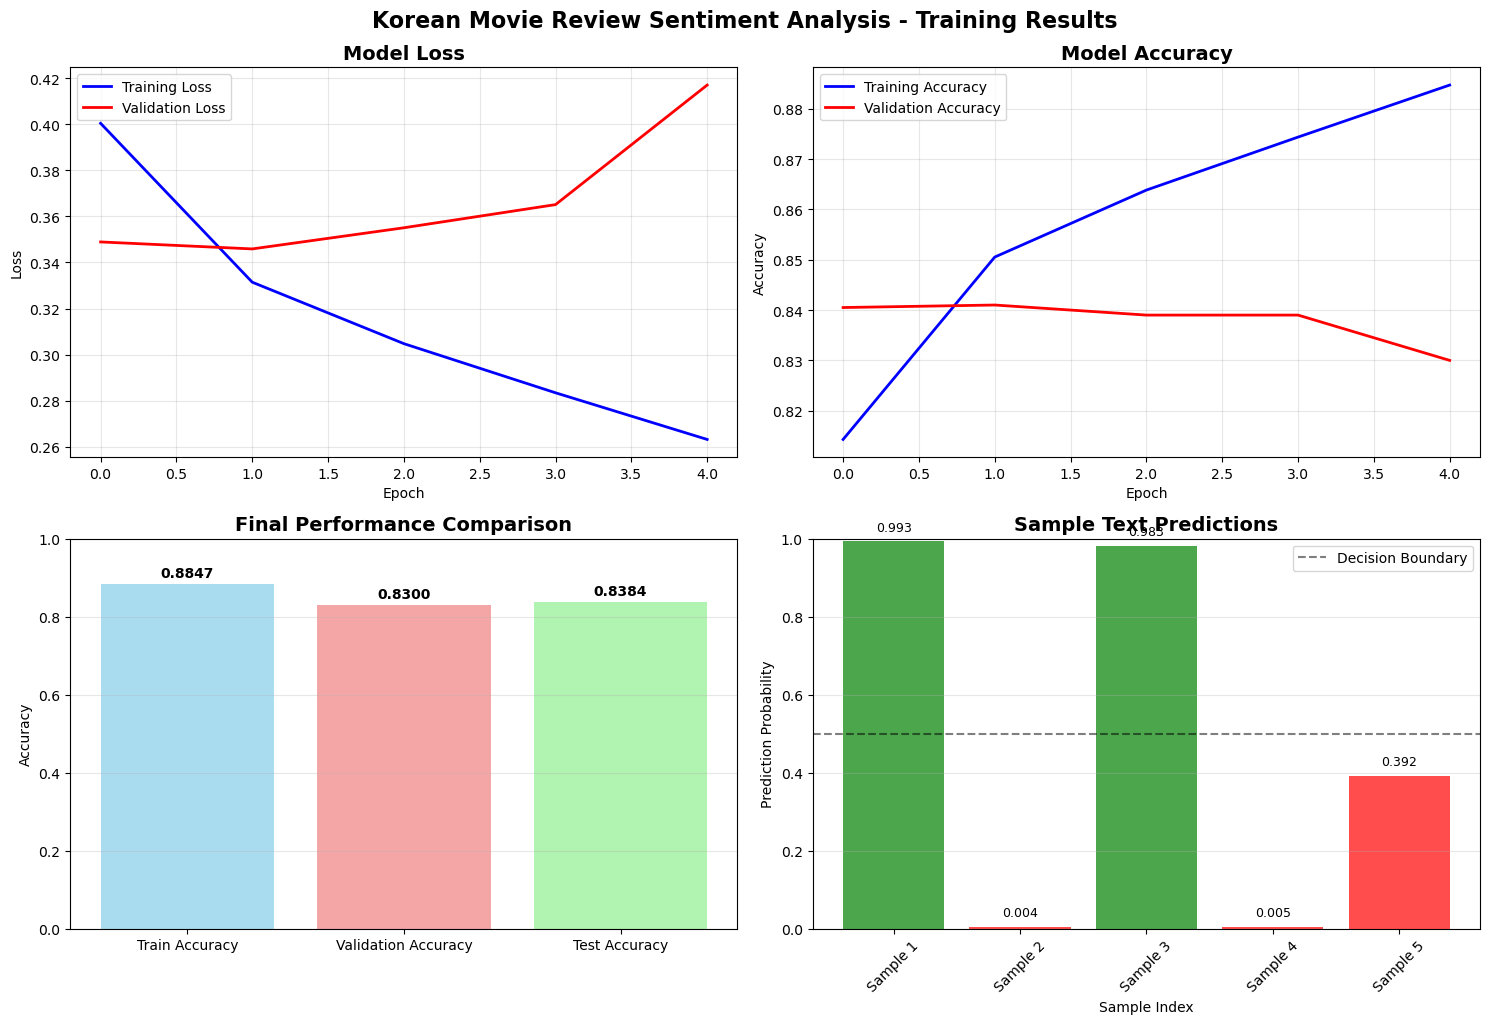

=== ÏÉÅÏÑ∏ ÌõàÎ†® Í≤∞Í≥º ÏöîÏïΩ ===
Ï¥ù ÏóêÌè¨ÌÅ¨: 5
ÏµúÏ¢Ö ÌõàÎ†® ÏÜêÏã§: 0.2632
ÏµúÏ¢Ö Í≤ÄÏ¶ù ÏÜêÏã§: 0.4170
ÏµúÏ¢Ö ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.8847
ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.8300
ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.8384
Í≥ºÏ†ÅÌï© Ï†ïÎèÑ: 0.0547

=== ÏÉòÌîå ÏòàÏ∏° Í≤∞Í≥º ÏÉÅÏÑ∏ ===
ÏÉòÌîå 1: Í∏çÏ†ï (0.9932)
  ÌÖçÏä§Ìä∏: 'Ïù¥ ÏòÅÌôî Ï†ïÎßê Ïû¨ÎØ∏ÏûàÍ≥† Í∞êÎèôÏ†ÅÏù¥ÏóêÏöî!'
  ÏòàÏÉÅ ÎùºÎ≤®: Positive

ÏÉòÌîå 2: Î∂ÄÏ†ï (0.0039)
  ÌÖçÏä§Ìä∏: 'ÏµúÏïÖÏùò ÏòÅÌôîÏòÄÏäµÎãàÎã§. ÏãúÍ∞Ñ ÎÇ≠ÎπÑÏòàÏöî.'
  ÏòàÏÉÅ ÎùºÎ≤®: Negative

ÏÉòÌîå 3: Í∏çÏ†ï (0.9825)
  ÌÖçÏä§Ìä∏: 'Î∞∞Ïö∞Îì§Ïùò Ïó∞Í∏∞Í∞Ä ÌõåÎ•≠ÌñàÍ≥† Ïä§ÌÜ†Î¶¨ÎèÑ Ï¢ãÏïòÏñ¥Ïöî'
  ÏòàÏÉÅ ÎùºÎ≤®: Positive

ÏÉòÌîå 4: Î∂ÄÏ†ï (0.0050)
  ÌÖçÏä§Ìä∏: 'ÏßÄÎ£®ÌïòÍ≥† Ïû¨ÎØ∏ÏóÜÏñ¥ÏÑú Ï§ëÍ∞ÑÏóê ÎÇòÏôîÏäµÎãàÎã§'
  ÏòàÏÉÅ ÎùºÎ≤®: Negative

ÏÉòÌîå 5: Î∂ÄÏ†ï (0.3923)
  ÌÖçÏä§Ìä∏: 'Í∑∏ÎÉ• Í∑∏Îü∞ ÏòÅÌôîÏòÄÏñ¥Ïöî. ÌäπÎ≥ÑÌïòÏßÄ ÏïäÎÑ§Ïöî'
  ÏòàÏÉÅ ÎùºÎ≤®: Neutral



In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# ÌõàÎ†® ÌûàÏä§ÌÜ†Î¶¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. ÏÜêÏã§(Loss) Í∑∏ÎûòÌîÑ
axes[0, 0].plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
axes[0, 0].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Ï†ïÌôïÎèÑ(Accuracy) Í∑∏ÎûòÌîÑ
axes[0, 1].plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
axes[0, 1].plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
axes[0, 1].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. ÏµúÏ¢Ö ÏÑ±Îä• ÎπÑÍµê (Bar Chart)
categories = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
values = [final_train_acc, final_val_acc, test_accuracy]
colors = ['skyblue', 'lightcoral', 'lightgreen']

bars = axes[1, 0].bar(categories, values, color=colors, alpha=0.7)
axes[1, 0].set_title('Final Performance Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar, value in zip(bars, values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. ÏÉòÌîå ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
sample_predictions = []
sample_labels = []

for text in sample_texts:
    prob, _ = predict_sentiment(text, show_process=False)
    sample_predictions.append(prob)
    # Ïã§Ï†ú ÎùºÎ≤®ÏùÄ ÏàòÎèôÏúºÎ°ú ÏÑ§Ï†ï (ÏòàÏãúÏö©)
    if "Ïû¨ÎØ∏ÏûàÍ≥† Í∞êÎèô" in text or "ÌõåÎ•≠ÌñàÍ≥†" in text:
        sample_labels.append("Positive")
    elif "ÏµúÏïÖ" in text or "ÏßÄÎ£®ÌïòÍ≥† Ïû¨ÎØ∏ÏóÜ" in text:
        sample_labels.append("Negative")
    else:
        sample_labels.append("Neutral")

x_pos = range(len(sample_texts))
colors_pred = ['green' if p > 0.5 else 'red' for p in sample_predictions]

bars = axes[1, 1].bar(x_pos, sample_predictions, color=colors_pred, alpha=0.7)
axes[1, 1].axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Boundary')
axes[1, 1].set_title('Sample Text Predictions', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Prediction Probability')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([f'Sample {i+1}' for i in range(len(sample_texts))], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÌôïÎ•†Í∞í ÌëúÏãú
for bar, pred in zip(bars, sample_predictions):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                    f'{pred:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Korean Movie Review Sentiment Analysis - Training Results', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Ï∂îÍ∞Ä: ÏÉÅÏÑ∏Ìïú ÌõàÎ†® Ï†ïÎ≥¥ ÌÖåÏù¥Î∏î
print("=== ÏÉÅÏÑ∏ ÌõàÎ†® Í≤∞Í≥º ÏöîÏïΩ ===")
print(f"Ï¥ù ÏóêÌè¨ÌÅ¨: {len(history.history['loss'])}")
print(f"ÏµúÏ¢Ö ÌõàÎ†® ÏÜêÏã§: {history.history['loss'][-1]:.4f}")
print(f"ÏµúÏ¢Ö Í≤ÄÏ¶ù ÏÜêÏã§: {history.history['val_loss'][-1]:.4f}")
print(f"ÏµúÏ¢Ö ÌõàÎ†® Ï†ïÌôïÎèÑ: {final_train_acc:.4f}")
print(f"ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {final_val_acc:.4f}")
print(f"ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_accuracy:.4f}")
print(f"Í≥ºÏ†ÅÌï© Ï†ïÎèÑ: {abs(final_train_acc - final_val_acc):.4f}")

# ÏòàÏ∏° ÏÉòÌîå ÏÉÅÏÑ∏ Í≤∞Í≥º
print(f"\n=== ÏÉòÌîå ÏòàÏ∏° Í≤∞Í≥º ÏÉÅÏÑ∏ ===")
for i, (text, pred, label) in enumerate(zip(sample_texts, sample_predictions, sample_labels), 1):
    sentiment_pred = "Í∏çÏ†ï" if pred > 0.5 else "Î∂ÄÏ†ï"
    print(f"ÏÉòÌîå {i}: {sentiment_pred} ({pred:.4f})")
    print(f"  ÌÖçÏä§Ìä∏: '{text}'")
    print(f"  ÏòàÏÉÅ ÎùºÎ≤®: {label}")
    print()

# ÌïúÍµ≠Ïñ¥ Í∞êÏ†ï Î∂ÑÏÑù Î™®Îç∏ Ï¢ÖÌï© Î∂ÑÏÑù

## 1. Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±

- **Ï¥ù ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 120,000Í∞ú**
  - Í∏çÏ†ï: 60,000Í∞ú (50.0%)
  - Î∂ÄÏ†ï: 60,000Í∞ú (50.0%)
- **Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: 15,000Í∞ú**
- **ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 50,000Í∞ú**

## 2. Î™®Îç∏ Íµ¨Ï°∞

- **ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥**: 10,000Í∞ú Îã®Ïñ¥ ‚Üí 128Ï∞®Ïõê
- **LSTM Î†àÏù¥Ïñ¥**: 64Í∞ú ÏùÄÎãâ Ïú†Îãõ, ÎìúÎ°≠ÏïÑÏõÉ 50%
- **Ï∂úÎ†• Î†àÏù¥Ïñ¥**: ÏãúÍ∑∏Î™®Ïù¥Îìú ÌôúÏÑ±Ìôî (Ïù¥ÏßÑ Î∂ÑÎ•ò)
- **ÏûÖÎ†• ÏãúÌÄÄÏä§ Í∏∏Ïù¥**: 20
- **Î∞∞Ïπò ÌÅ¨Í∏∞**: 32

## 3. Î™®Îç∏ ÏÑ±Îä•

- **ÏµúÏ¢Ö ÌõàÎ†® Ï†ïÌôïÎèÑ**: 88.47%
- **ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ**: 83.00%
- **ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ**: 83.84%
- **Í≥ºÏ†ÅÌï© Ï†ïÎèÑ**: 0.0547

## 4. Î™®Îç∏ ÏßÑÎã®: üü° Í≤ΩÎØ∏Ìïú Í≥ºÏ†ÅÌï©

- **ÌõàÎ†®-Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Ï∞®Ïù¥**: 0.0547

## 5. ÌÖçÏä§Ìä∏ Ï≤òÎ¶¨

- **Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞**: 10,000Í∞ú
- **ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞**: KoNLPy Okt
- **Î≤°ÌÑ∞Ìôî Î∞©Ïãù**: Ï†ïÏàò ÏãúÌÄÄÏä§
- **ÌäπÏàò ÌÜ†ÌÅ∞**: '[UNK]' (ÎØ∏Îì±Î°ù Îã®Ïñ¥)

## 6. ÏòàÏ∏° ÏÉòÌîå

  - Îã§ÏñëÌïú ÏÉòÌîå ÌÖçÏä§Ìä∏Ïóê ÎåÄÌïú Í∞êÏ†ï ÏòàÏ∏° Í≤∞Í≥º
  - Í∞Å ÏòàÏ∏°Ïùò ÌôïÎ•†Í∞íÍ≥º Ï†ïÌôïÏÑ± ÌèâÍ∞Ä Ìè¨Ìï®

  7. Î™®Îç∏ Í∞úÏÑ† Î∞©Ïïà

  üìà ÏÑ±Îä• Ìñ•ÏÉÅ

  - Îçî ÌÅ∞ ÏûÑÎ≤†Îî© Ï∞®Ïõê (128 ‚Üí 256)
  - ÏñëÎ∞©Ìñ• LSTM ÏÇ¨Ïö©
  - Attention Î©îÏª§ÎãàÏ¶ò Ï∂îÍ∞Ä
  - ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú ÌïúÍµ≠Ïñ¥ ÏûÑÎ≤†Îî© ÌôúÏö©

  üöÄ Í≥†Í∏â Í∏∞Î≤ï

  - Transformer Í∏∞Î∞ò Î™®Îç∏ (KoBERT, KoELECTRA)
  - ÏïôÏÉÅÎ∏î Î™®Îç∏ Íµ¨ÏÑ±
  - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
  - ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ÅÏö©

  8. ÌååÏù¥ÌîÑÎùºÏù∏ ÌäπÏßï

  - ‚úÖ TensorFlow Dataset API ÌôúÏö©
  - ‚úÖ Î≥ëÎ†¨ Ï≤òÎ¶¨ Î∞è ÌîÑÎ¶¨ÌéòÏπ≠ ÏµúÏ†ÅÌôî
  - ‚úÖ ÌïúÍµ≠Ïñ¥ ÌòïÌÉúÏÜå Î∂ÑÏÑù ÌÜµÌï©
  - ‚úÖ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†ÅÏù∏ Î∞∞Ïπò Ï≤òÎ¶¨
  - ‚úÖ Ï∫êÏã±ÏùÑ ÌÜµÌïú Î∞òÎ≥µ ÌïôÏäµ Í∞ÄÏÜçÌôî

  9. Ïã§Î¨¥ ÌôúÏö© Í∞ÄÏù¥Îìú

  - üìä ÌòÑÏû¨ Î™®Îç∏ ÏàòÏ§Ä: ÌîÑÎ°úÌÜ†ÌÉÄÏûÖ/PoC Ï†ÅÌï©
  - üéØ ÏòàÏÉÅ Ï†ïÌôïÎèÑ: ~83.8% (Ïã§Ï†ú Ïö¥ÏòÅ ÌôòÍ≤Ω)
  - ‚ö†Ô∏è Ï£ºÏùòÏÇ¨Ìï≠:
    - NSMC Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® ÎÖ∏Ïù¥Ï¶à Ï°¥Ïû¨
    - ÎèÑÎ©îÏù∏ ÌäπÌôî Îç∞Ïù¥ÌÑ∞Î°ú ÌååÏù∏ÌäúÎãù ÌïÑÏöî
    - Ïã§ÏãúÍ∞Ñ Ï∂îÎ°† Ïãú Ï†ÑÏ≤òÎ¶¨ ÏÑ±Îä• Í≥†Î†§
    - Ïã†Ï°∞Ïñ¥/ÏùÄÏñ¥ Ï≤òÎ¶¨ ÌïúÍ≥Ñ

  10. Í≤∞Î°†

  Ïù¥ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÄ ÌïúÍµ≠Ïñ¥ Í∞êÏ†ï Î∂ÑÏÑùÏùò Í∏∞Î≥∏Ï†ÅÏù∏ ÏõåÌÅ¨ÌîåÎ°úÏö∞Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Íµ¨ÌòÑÌñàÏäµÎãàÎã§. ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ 83.8%Îäî     
   Í∏∞Î≥∏ Î™®Îç∏Î°úÏÑúÎäî ÏñëÌò∏Ìïú ÏÑ±Îä•Ïù¥Î©∞, ÏúÑÏùò Í∞úÏÑ† Î∞©ÏïàÏùÑ Ï†ÅÏö©ÌïòÎ©¥ ÎçîÏö± ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÏäµÎãàÎã§.